# Семинар 1 - Основы работы с OpenCV, цветовые пространства, интегральные изображения

***

Источник используемого аэрофотоснимка: https://sovzond.ru/upload/medialibrary/267/%D0%98%D1%81%D1%85%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9-%D0%B0%D1%8D%D1%80%D0%BE%D1%84%D0%BE%D1%82%D0%BE%D1%81%D0%BD%D0%B8%D0%BC%D0%BE%D0%BA.jpg

In [3]:
from pathlib import Path

import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
IMG_PATH = "data/Lenna_test_image.jpeg"

if not Path(IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2025.git
    !mv cv_course_2024/seminars/seminar_01/data .

# 1. Основы работы с OpenCV

## Чтение, отображение и сохранение изображений

Для чтения изображения из файла используется функция `cv2.imread`, для отображения изображения на экране - функция `cv2.imshow`, для сохранения изображения в файл - функция `cv2.imwrite`.

`cv2.imread(path, flag)` - читает изображение из файла по пути path. Флаг flag определяет формат считывания изображения. Возможные значения флага:
- `cv2.IMREAD_COLOR` - считывание изображения в цвете (значение по умолчанию, можно не указывать в явном виде)
- `cv2.IMREAD_UNCHANGED` - считывание изображения в цвете "как есть" (с альфа-каналом, если он есть)
- `cv2.IMREAD_GRAYSCALE` - считывание изображения в оттенках серого

In [5]:
img = cv2.imread(IMG_PATH, cv2.IMREAD_COLOR)  # cv2.IMREAD_COLOR обычно не указывают, так как это значение по умолчанию

`cv2.imshow("window_name", image)` - отображает изображение img в окне с именем window_name. Если окно с таким именем не существует, то оно будет создано. Если окно существует, то оно будет очищено и в нем будет отображено изображение img.

Пример кода:
```python
import cv2

img = cv2.imread("image.jpg", cv2.IMREAD_COLOR)
cv2.imshow("image", img)
cv2.waitKey(0)  # ожидание нажатия клавиши, иначе окно закроется сразу же
cv2.destroyAllWindows()  # закрытие всех окон
```

Однако это работает только в скриптах при наличии GUI. Пример такого скрипта: [show_image.py](show_image.py)

В Jupyter Notebook для отображения изображения используется функция `plt.imshow`.

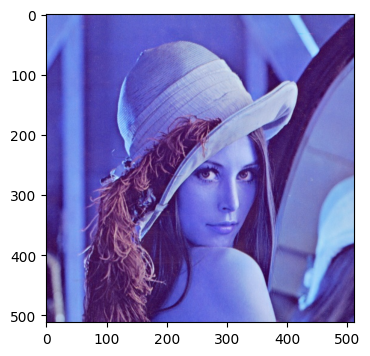

In [6]:
plt.figure(figsize=[4, 4])
plt.imshow(img);

Как видно, цвета изображения неправильные. **Функция `cv2.imread` считывает изображения в формате BGR** (blue, green, red). Чтобы перейти к более привычному представлению RGB (reg, green, blue), который ожидает matplotlib, можно воспользоваться встроенной функцией cvtColor:

In [47]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

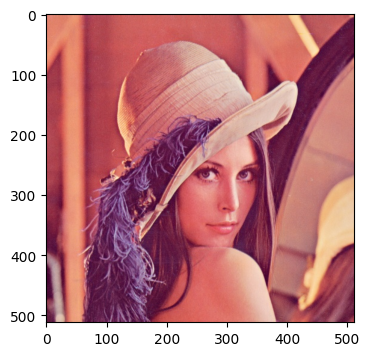

In [8]:
plt.figure(figsize=[4, 4])
plt.imshow(img_rgb);

## Работа с изображением

Загруженное цветное изображение является обычным numpy массивом с тремя размерностями (`shape` - (H, W, C), **channel-last**), каждый элемент которого - целое беззнаковое 8-ми битное число, представляющее квантованную на 256 уровней интенсивность одного из цветов:

In [7]:
print('type(img_rgb) = ', type(img_rgb))
print('img_rgb.shape = ', img_rgb.shape)
print('img_rgb.dtype = ', img_rgb.dtype)

type(img_rgb) =  <class 'numpy.ndarray'>
img_rgb.shape =  (512, 512, 3)
img_rgb.dtype =  uint8


Над изображением можно выполнять те же операции, что и над обычным массивом. Например, рассчитать статистики:

In [9]:
print('img_rgb.min() = ', img_rgb.min())
print('img_rgb.max() = ', img_rgb.max())
print('img_rgb.mean() = ', img_rgb.mean())
print('img_rgb.std() = ', img_rgb.std())
print('np.median(img_rgb) = ', np.median(img_rgb))

img_rgb.min() =  0
img_rgb.max() =  255
img_rgb.mean() =  128.22198232014975
img_rgb.std() =  58.942859735329606
np.median(img_rgb) =  119.0


присвоить какое-либо значение блоку(пикселю):

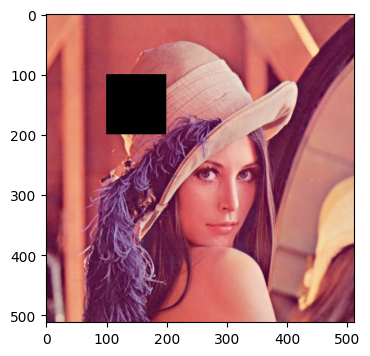

In [10]:
img_rgb_2 = img_rgb.copy()
img_rgb_2[100:200, 100:200] = 0

plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_2);

прибавить какое-либо значение блоку(пикселю):

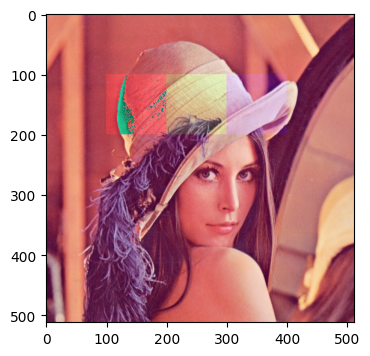

In [11]:
img_rgb_3 = img_rgb.copy()
img_rgb_3[100:200, 100:200, 0] += 40
img_rgb_3[100:200, 200:300, 1] += 40
img_rgb_3[100:200, 300:400, 2] += 40

plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_3);

### Вопрос

- Что произошло с цветами на изображении img_rgb_3? Почему так произошло?

Ответ: в самом левом квадрате цвет стал более красным, посередине - зеленее, справа - голубее (фиолетовым)

## Альтернативы OpenCV

1. Библиотека `Pillow` (Python Imaging Library, PIL). В OpenCV изображения представляются в виде матриц, а в Pillow - в виде объектов класса `Image`.

In [12]:
from PIL import Image

img_pil = Image.open(IMG_PATH)
print('type(img_pil) = ', type(img_pil))
print('img_pil.size = ', img_pil.size)
print('img_pil.mode = ', img_pil.mode)

type(img_pil) =  <class 'PIL.JpegImagePlugin.JpegImageFile'>
img_pil.size =  (512, 512)
img_pil.mode =  RGB


2. Библиотека `scikit-image`. Изображения представлены в виде `np.ndarray`. Порядок каналов - **сразу RGB**. `shape` - (H, W, C), **channel-last**.

type(img_ski) =  <class 'numpy.ndarray'>
img_ski.shape =  (512, 512, 3)
img_ski.dtype =  uint8


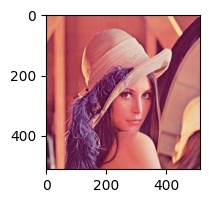

In [14]:
import skimage as ski

img_ski = ski.io.imread(IMG_PATH)
print('type(img_ski) = ', type(img_ski))
print('img_ski.shape = ', img_ski.shape)
print('img_ski.dtype = ', img_ski.dtype)

plt.figure(figsize=[2, 2])
plt.imshow(img_ski);

3. `torchvision` - библиотека для работы с изображениями, входящая в состав PyTorch. Изображения представлены в виде `torch.Tensor`. Порядок каналов - **сразу RGB**. `shape` - (C, H, W), **channel-first**.

In [15]:
from torchvision.io import read_image  # читает изображение сразу в формате torch.Tensor

img_torch = read_image(IMG_PATH)
print('type(img_torch) = ', type(img_torch))
print('img_torch.shape = ', img_torch.shape)
print('img_torch.dtype = ', img_torch.dtype)

type(img_torch) =  <class 'torch.Tensor'>
img_torch.shape =  torch.Size([3, 512, 512])
img_torch.dtype =  torch.uint8


4. **DALI** - библиотека для быстрой обработки изображений на GPU. Подробнее: https://developer.nvidia.com/blog/rapid-data-pre-processing-with-nvidia-dali/

## Упражнения

### Упражнение 1: BGR -> RGB
Реализуйте функцию преобразования изображения в формате BGR в формат RGB

In [16]:
def convert_color_bgr_to_rgb(img_bgr: np.ndarray) -> np.ndarray:
    '''
    input: bgr image
    output: rgb image
    '''
    img_rgb = img_bgr.copy()
    img_rgb[:, :, 0], img_rgb[:, :, 2] = img_bgr[:, :, 2], img_bgr[:, :, 0]
    
    return img_rgb

In [17]:
assert((img_rgb == convert_color_bgr_to_rgb(img)).all())

### Упражнение 2: Изменение яркости
Одним из простейших преобразований изображения является изменение уровня яркости, задаваемое следующим образом:

$$
f'(x, y) = \alpha f(x, y) + \beta
$$

Реализуйте данную операцию с помощью `cv2.convertScaleAbs` - [туториал](https://docs.opencv.org/4.x/d3/dc1/tutorial_basic_linear_transform.html).

В данном упражнении необходимо исследовать работу функции при различных значениях параметров. Протестируйте разные значения alpha и beta, например $\alpha \in \set{0.8, 1, 1.2, 2}$, $\beta \in \set{-10, 0, 10}$

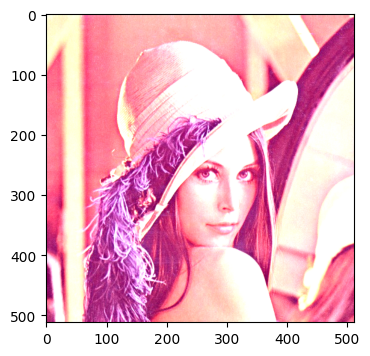

In [18]:
alpha = 2
beta = -10

img_new = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

plt.figure(figsize=[4, 4])
plt.imshow(img_new);

### Упражнение 3: Смешивание изображений $\alpha - blend$

Другим простым преобразованием является смешивание двух изображений, задаваемое как:

$$
    f'(x, y) = \alpha f_1(x, y) + (1 - \alpha) f_2(x, y)
$$

Реализуйте данную операцию с помощью `cv2.addWeighted` - [туториал](https://docs.opencv.org/3.4/d5/dc4/tutorial_adding_images.html).

Вы можете использовать изображение `data/opencv_logo.jpeg` или загрузить свое.


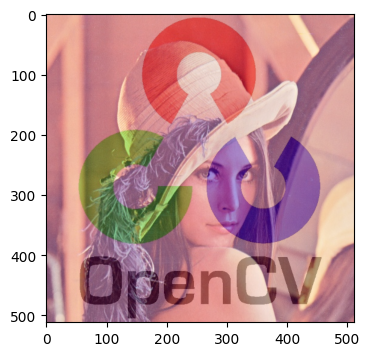

In [19]:
alpha = 0.7
beta = 1 - alpha

logo = cv2.imread('data/opencv_logo.jpeg')[..., ::-1]

img_new = cv2.addWeighted(img_rgb, alpha, cv2.resize(logo, (img_rgb.shape[1], img_rgb.shape[0])), beta, 0)

plt.figure(figsize=[4, 4])
plt.imshow(img_new);

## Нанесение текста и фигур

С помощью OpenCV можно добавить дополнительные элементы на изображение, такие как текст, простые геометрические фигуры и т.д. (см. https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

In [20]:
TEXT = 'Lenna 0.99'
UL_CORNER = (200, 200)  # верхний левый угол
FONT = 0                # шрифт
SCALE = 1               # размер
COLOR = (0, 255, 0)     # цвет - зеленый
THICKNESS = 2           # толщина линий

img_rgb_4 = img_rgb.copy()

cv2.putText(img_rgb_4, TEXT, UL_CORNER, FONT, SCALE, COLOR, THICKNESS)
cv2.rectangle(img_rgb_4, UL_CORNER, (370, 400), COLOR, THICKNESS);

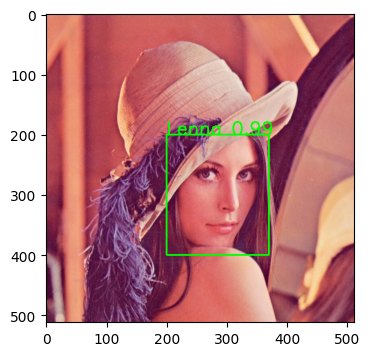

In [21]:
plt.figure(figsize=[4, 4])
plt.imshow(img_rgb_4);

### Вопрос

- Зачем может понадобиться рисовать на изображении?

Например, подписать объект при декции. Или что-то типо аугментации.

# 2. Фильтр Байера

Сырые изображения, приходящие с камеры, являются байеризованными. Они представлены в виде двумерного массива, где отдельные пиксели кодируют интенсивность синего, зеленого, красного цветов. 

![Фильтр Байера](data/bayer.jpeg)


## Домашнее задание (опциональное)

В ноутбуке [`demosaicing.ipynb`](demosaicing.ipynb).

Вспомогательные материалы - [слайды](slides_demosaicing.pdf).


# Часть 2

In [22]:
AERIAL_IMG_PATH = "data/aerial_image.jpg"
SUNFLOWER_IMG_PATH = "data/sunflower.jpg"

if not Path(AERIAL_IMG_PATH).exists() or not Path(SUNFLOWER_IMG_PATH).exists():
    !git clone https://github.com/alexmelekhin/cv_course_2023.git
    !mv cv_course_2023/seminars/seminar_02/data .

# 1. Цветовые пространства

Наиболее распространенным представлением цвета пикселя является пространство RGB. В таком представлении цвет представлен тремя числами: интенсивностями красного, зеленого и синего базисных цветов.

In [23]:
img = cv2.imread(SUNFLOWER_IMG_PATH)

In [24]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

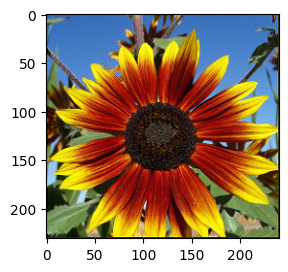

In [25]:
plt.figure(figsize=[3, 3])
plt.imshow(img_rgb);

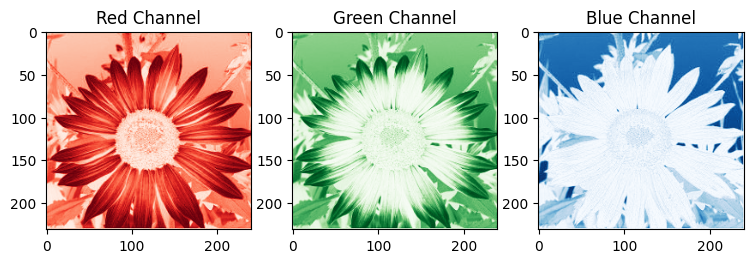

In [26]:
plt.figure(figsize=[9, 3])

plt.subplot(131)
plt.imshow(img_rgb[:,:,0], cmap='Reds')
plt.title('Red Channel')

plt.subplot(132)
plt.imshow(img_rgb[:,:,1], cmap='Greens')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(img_rgb[:,:,2], cmap='Blues')
plt.title('Blue Channel')

plt.show()

cvtColor поддерживает конвертацию между множеством других цветовых схем. К примеру, чтобы получить серое изобаржение из цветного достаточно:

In [27]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

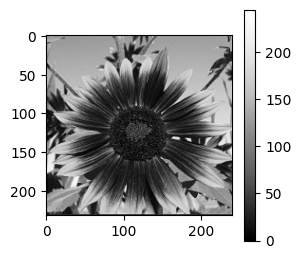

In [28]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

## Вопрос 1

**Этот и все последующие вопросы - оцениваемые, для самостоятельной работы.**

Можно ли получить черно-белое изображение из RGB представления путем вычисления среднего значения интенсивностей каналов R, G и B? Почему?

**Ответ:** Да, можно получить “серое” изображение, но оно будет неправильным, так как человек по-разному чувствителен к каналам.

## Вопрос 2

Почему мы использовали флаг `cmap='Greys_r'` при отображении черно-белого изображения? Чем отличается от `cmap='Greys'`?

**Ответ:** Greys_r используется, когда надо, например, чтобы “большие значения” выглядели темнее.

Если не предполагается использовать информацию о цвете пикселей, то можно сразу загрузить изображение в оттенках серого:

In [29]:
img_gray = cv2.imread(SUNFLOWER_IMG_PATH, cv2.IMREAD_GRAYSCALE)

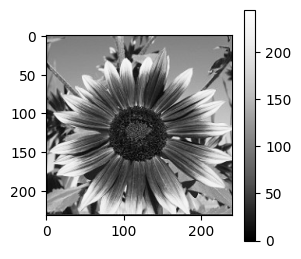

In [30]:
plt.figure(figsize=[3, 3])
plt.imshow(img_gray, cmap='Greys_r')
plt.colorbar()
plt.show()

серое изображение - двумерный массив:

In [31]:
print('type(img_gray) = ', type(img_gray))
print('img_gray.shape = ', img_gray.shape)
print('img_gray.dtype = ', img_gray.dtype)

type(img_gray) =  <class 'numpy.ndarray'>
img_gray.shape =  (231, 240)
img_gray.dtype =  uint8


## Упражнение 1: RGB to gray

**Это и все последующие упражения - оцениваемые, для самостоятельной работы.**

Реализуйте функцию преобразования цветного изображения в формате RGB в серое

In [95]:
def convert_rgb_to_grayscale(img_rgb: np.ndarray) -> np.ndarray:
    r = img_rgb[..., 0].astype(np.float32)
    g = img_rgb[..., 1].astype(np.float32)
    b = img_rgb[..., 2].astype(np.float32)

    y = 0.299 * r + 0.587 * g + 0.114 * b
    return y.astype(img_rgb.dtype)



In [96]:
assert((cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) == convert_rgb_to_grayscale(img_rgb)).all())

AssertionError: 

Кроме RGB/BGR и grayscale существуют и другие цветовые представления. Преобразования между ними можно осуществлять с помощью библиотеки OpenCV следующим способом:

## RGB to HSV

HSV - цветовое пространство, в котором цвет представлен тремя компонентами: Hue (оттенок), Saturation (насыщенность) и Value (значение). Это позволяет задавать цвета в более естественной форме, чем RGB.

**Составляющая H** соответствует цветовому тону и варьируется в пределах 0–360°, в частности 0° – чистый красный цвет, 60° – жёлтый, 120° – зеленый, 180° – голубой, 240° – синий, 300° – фиолетовый.

**Насыщенность S** позволяет оценить насколько «чистым» является данный цвет, она определяет соотношение серого цвета и выбранного оттенка и варьируется от 0 (серый) до 1 (полностью насыщенный).

**Мера яркости V** задает относительную освещенность и измеряется в диапазоне от 0 (черный) до 1 (белый).

Цветовая модель HSV связана с моделью RGB нелинейным преобразованием:
$$
H = 
\begin{cases} 
H_1, & \text{если } B \leq G, \\
360^\circ - H_1, & \text{если } B > G, 
\end{cases}
\text{где } H_1 = \arccos\left( \frac{0.5[(R - G) + (R - B)]}{\sqrt{(R - G)^2 + (R - B)(G - B)}} \right),
$$

$$
S = \frac{\max(R, G, B) - \min(R, G, B)}{\max(R, G, B)}, \quad 
V = \frac{\max(R, G, B)}{255}
$$

In [52]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

можно попробовать отобразить изображение так же, как и RGB:

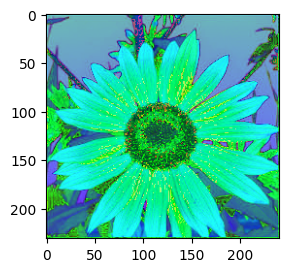

In [53]:
plt.figure(figsize=[3, 3])
plt.imshow(img_hsv);

Однако это не совсем корректно, так как Hue - это угол, а не интенсивность. Поэтому лучше отобразить оттенок в виде цвета, а насыщенность и значение - в виде яркости:

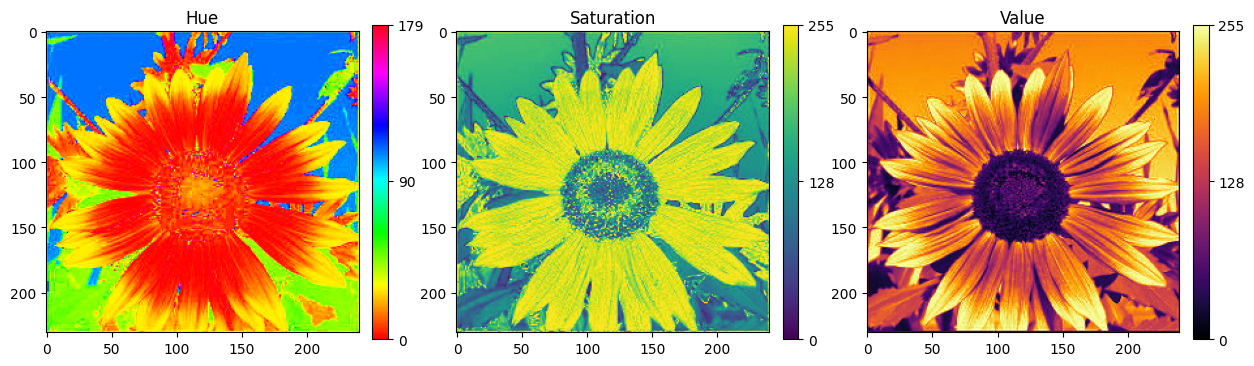

In [54]:
h, s, v = cv2.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=[15, 5])

im1 = axs[0].imshow(h, cmap="hsv")
axs[0].set_title('Hue')
cbar1 = plt.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04, ticks=[0, 90, 179])
cbar1.ax.set_yticklabels(['0', '90', '179'])

im2 = axs[1].imshow(s, cmap="viridis")  # Using 'viridis' for Saturation
axs[1].set_title('Saturation')
cbar2 = plt.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar2.ax.set_yticklabels(['0', '128', '255'])

im3 = axs[2].imshow(v, cmap="inferno")  # Using 'inferno' for Value
axs[2].set_title('Value')
cbar3 = plt.colorbar(im3, ax=axs[2], fraction=0.046, pad=0.04, ticks=[0, 128, 255])
cbar3.ax.set_yticklabels(['0', '128', '255'])

plt.show()

## Упражнение 2

Попробуйте другие цветовые пространства, конвертация в которые реализована в OpenCV.

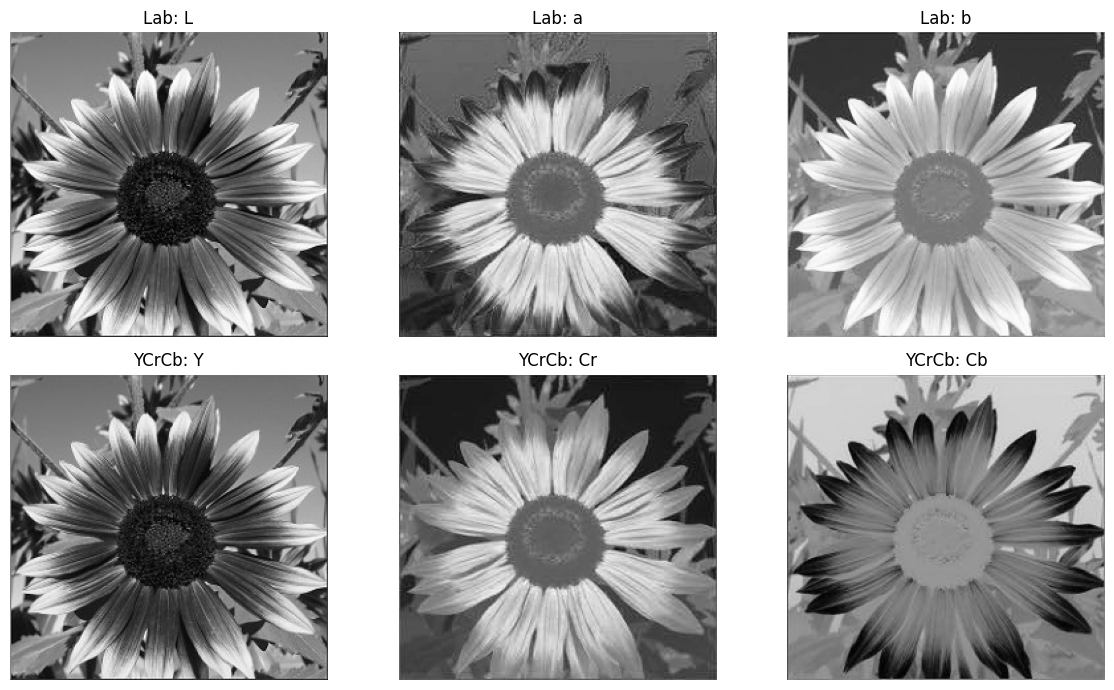

In [56]:
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)

L, a, b = cv2.split(img_lab)
Y, Cr, Cb = cv2.split(img_ycrcb)

fig, axs = plt.subplots(2, 3, figsize=(12, 7))

axs[0, 0].imshow(L, cmap="gray");  axs[0, 0].set_title("Lab: L")
axs[0, 1].imshow(a, cmap="gray");  axs[0, 1].set_title("Lab: a")
axs[0, 2].imshow(b, cmap="gray");  axs[0, 2].set_title("Lab: b")

axs[1, 0].imshow(Y, cmap="gray");  axs[1, 0].set_title("YCrCb: Y")
axs[1, 1].imshow(Cr, cmap="gray"); axs[1, 1].set_title("YCrCb: Cr")
axs[1, 2].imshow(Cb, cmap="gray"); axs[1, 2].set_title("YCrCb: Cb")

for ax in axs.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()

## Вопрос 3

В каких задачах переход из RGB в другое цветовое пространство может быть полезным?

**Ответ:** Например, когда нужна устойчивость к изменению освещенности, или нужна коррекция яркости без сильного влияния на цвет (Lab, YCrCb: можно работать по компоненте яркости L/Y, а цвет — отдельно). HSV можно использовать про поиске объектов по цвету.

# 2. Гистограмма изображения

Напомним, что гистограммой изображения называется функция, показыващая количество пикселей изображения с заданным в качестве аргумента значением интенсивности:

$$
    h(v) = \sum_{x = 0}^{W - 1} \sum_{y = 0}^{H - 1} [f(x, y) = v] 
$$

Если дополнительно потребовать, чтобы $\sum_{v = 0}^{255} h(v) = 1$, то $h$ будет представлять функцию плотности распределения интенсивности на изображении.

Определим вспомогательную функцию, позволяющую визуализировать гистограмму:

In [57]:
def visualize_hist(hist):
    plt.figure(figsize=[12, 3])
    plt.bar(np.arange(len(hist)), hist / hist.sum())

Рассчитать гистограмму можно с помощью встроенной функции OpenCV:

In [58]:
hist_cv = cv2.calcHist([img_gray],      # список изображений
                       [0],             # список каналов
                       None,            # маска (без маски)
                       [256],           # размер гистограммы
                       [0, 256])[:, 0]  # диапазон значений

Результат представляет собой обычный массив длины 256:

In [59]:
print('hist_cv.shape = ', hist_cv.shape)

hist_cv.shape =  (256,)


и выглядит следующим образом:

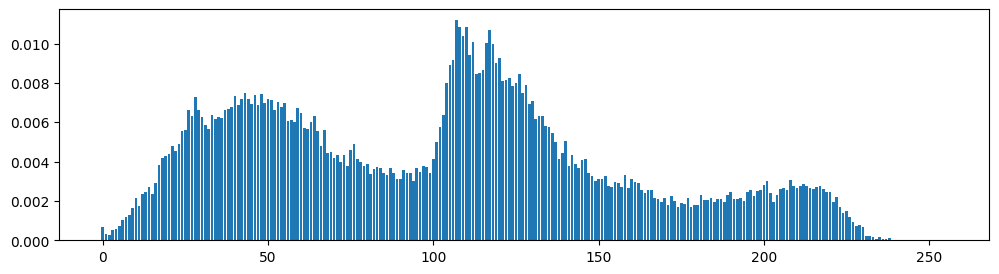

In [60]:
visualize_hist(hist_cv)

## Упражнение 3: Построение гистограммы

Реализуйте функцию для расчета гистограммы изображения. Используйте ее для визуализации трех каналов RGB изображения.

In [61]:
def compute_hist(img):
    img_u8 = img.astype(np.uint8, copy=False)
    hist = np.bincount(img_u8.ravel(), minlength=256).astype(np.float32)
    return hist

In [62]:
hist_gray = compute_hist(img_gray)

hist_r = compute_hist(img_rgb[:, :, 0])
hist_g = compute_hist(img_rgb[:, :, 1])
hist_b = compute_hist(img_rgb[:, :, 2])

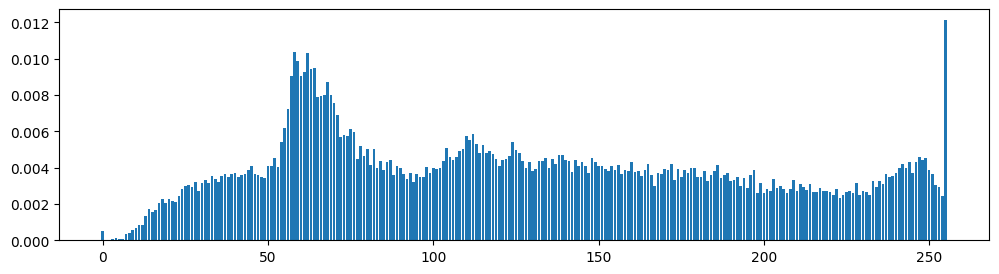

In [63]:
visualize_hist(hist_r)

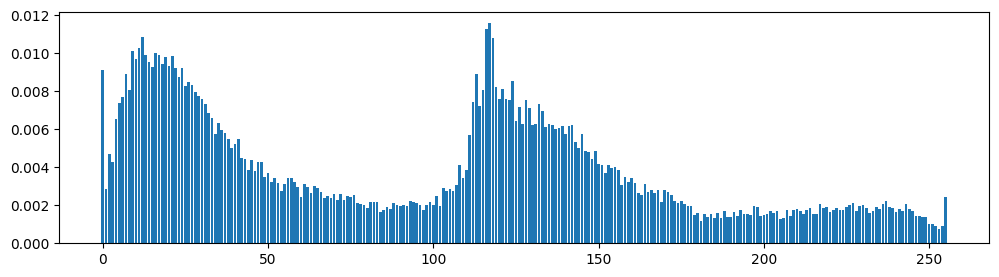

In [64]:
visualize_hist(hist_g)

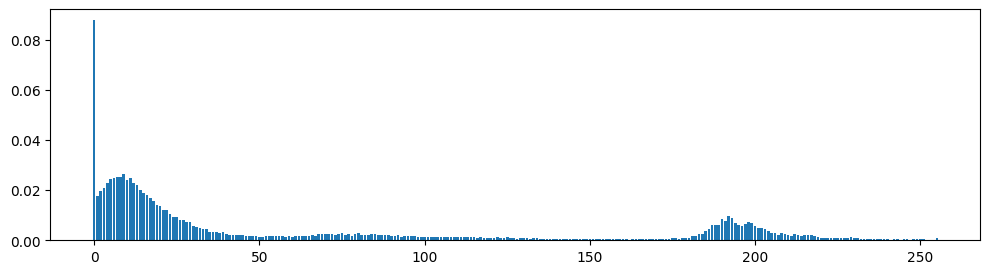

In [65]:
visualize_hist(hist_b)

In [66]:
assert((hist_gray == hist_cv).all())

## Вопрос 4

 Что можно сказать об изображении по его гистограмме?

**Ответ:** Общая яркость, контраст, проблемы экспозиции, распределение тонов, цветовой баланс.

## Вопрос 5

Допустим, вы смотрите некоторый фильм и для текущего кадра выводите его гистограмму. Как будет меняться эта гистограмма с течением времени? Опишите несколько случаев: смена камеры, смена освещения, смена сцены.

**Ответ:** Плавное смещение пикселей — объекты движутся, но общее распределение яркости и цветов сохраняет схожую форму. При смене освещения тоже гистограмма меняется плавно. А смена сцены и монтажный стык приводит к полному изменению формы гистограммы.

## Упражнение 4: JPEG и гистограмма

Исследуйте, как влияет степень сжатия алгоритма JPEG на вид гистограммы изображения.

Используйте черно-белое изображение `img_gray`. Визуализируйте степени сжатия 90, 60, 30, 5.

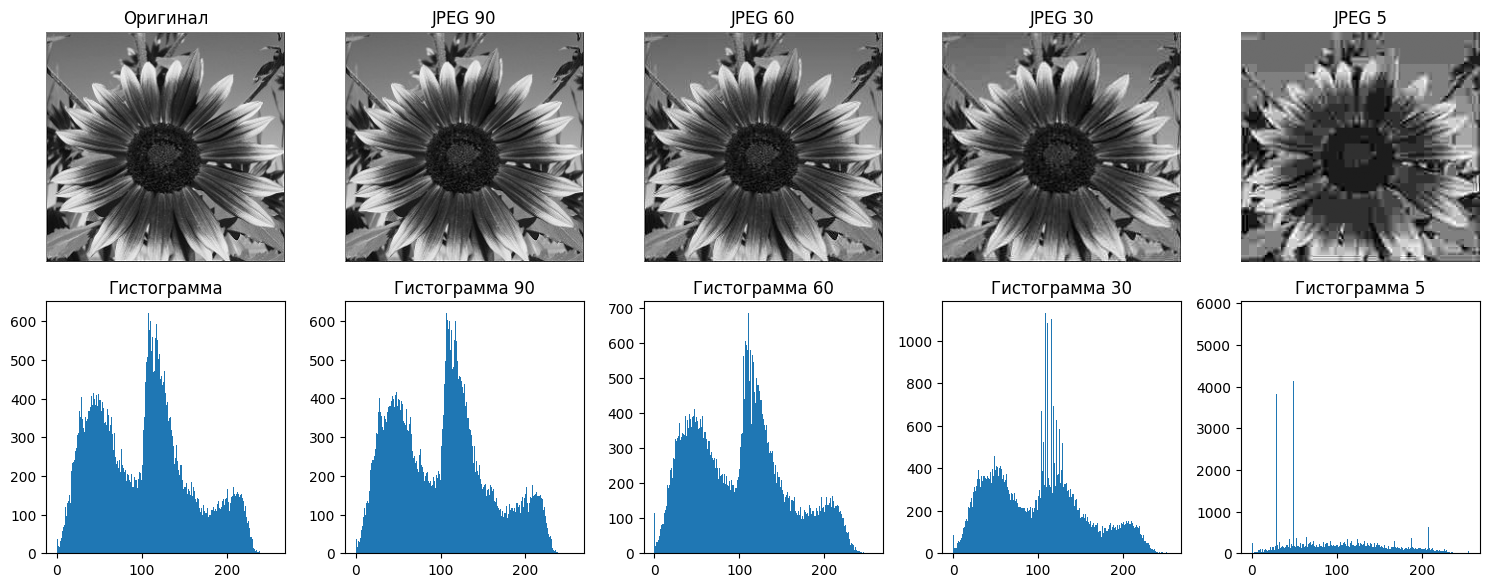

In [68]:
qualities = [90, 60, 30, 5]

# Визуализация
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Оригинал
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title('Оригинал')
axes[0, 0].axis('off')
axes[1, 0].hist(img_gray.ravel(), bins=256, range=(0, 256))
axes[1, 0].set_title('Гистограмма')

# Сжатие JPEG
for i, q in enumerate(qualities):
    cv2.imwrite('temp.jpg', img_gray, [cv2.IMWRITE_JPEG_QUALITY, q])
    img_comp = cv2.imread('temp.jpg', cv2.IMREAD_GRAYSCALE)
    
    axes[0, i+1].imshow(img_comp, cmap='gray')
    axes[0, i+1].set_title(f'JPEG {q}')
    axes[0, i+1].axis('off')
    axes[1, i+1].hist(img_comp.ravel(), bins=256, range=(0, 256))
    axes[1, i+1].set_title(f'Гистограмма {q}')
plt.tight_layout()
plt.show()

## Упражнение 5: Сегментация

На загруженном аэроортофотоплане выделите зеленые насаждения. Для этого постройте бинарную маску, где 1 будет отвечать наличию насаждений в данном пикселе, 0 - их отсутствию, и визуализируйте её. А также рассчитайте, какую долю изображения занимают зеленые насаждения. С какой ошибкой (погрешностью) получена эта величина?

**Подсказка:** вам должно помочь HSV пространство и гистограмма. Погрешность может быть оценена на глаз, по вашей неуверенности в определении порога отделения классов 'зеленые насаждения'/'прочее'.

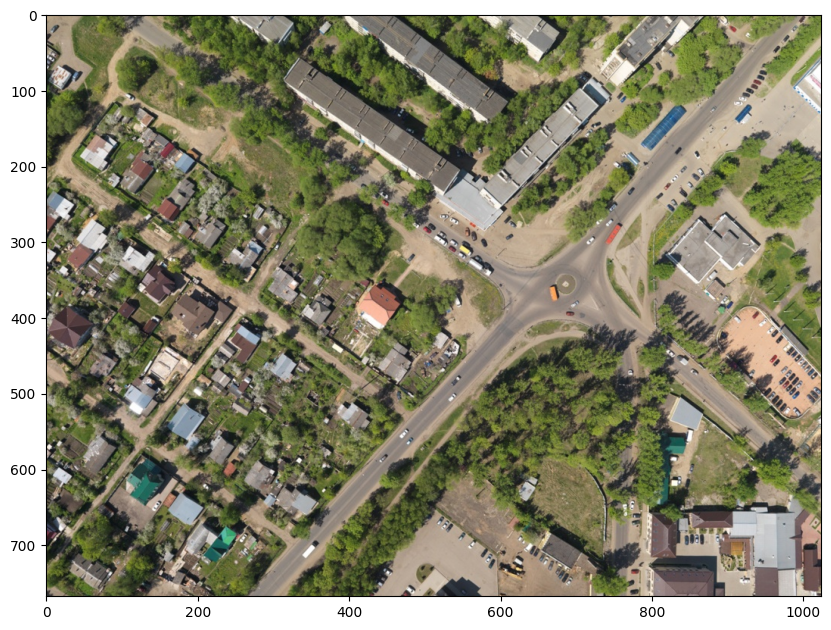

In [69]:
aerial_image = cv2.cvtColor(cv2.imread(AERIAL_IMG_PATH), cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10, 10])
plt.imshow(aerial_image);

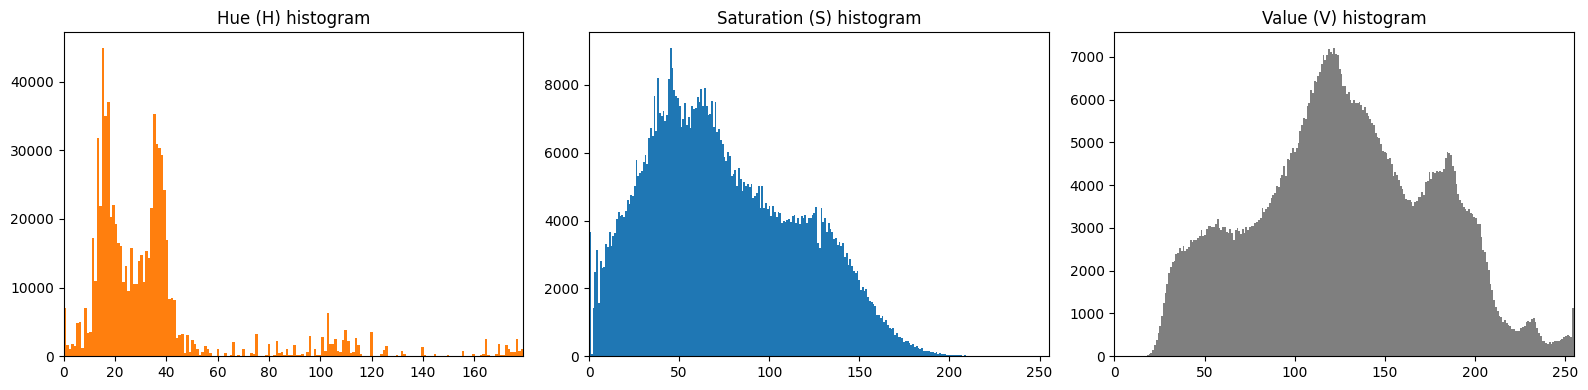

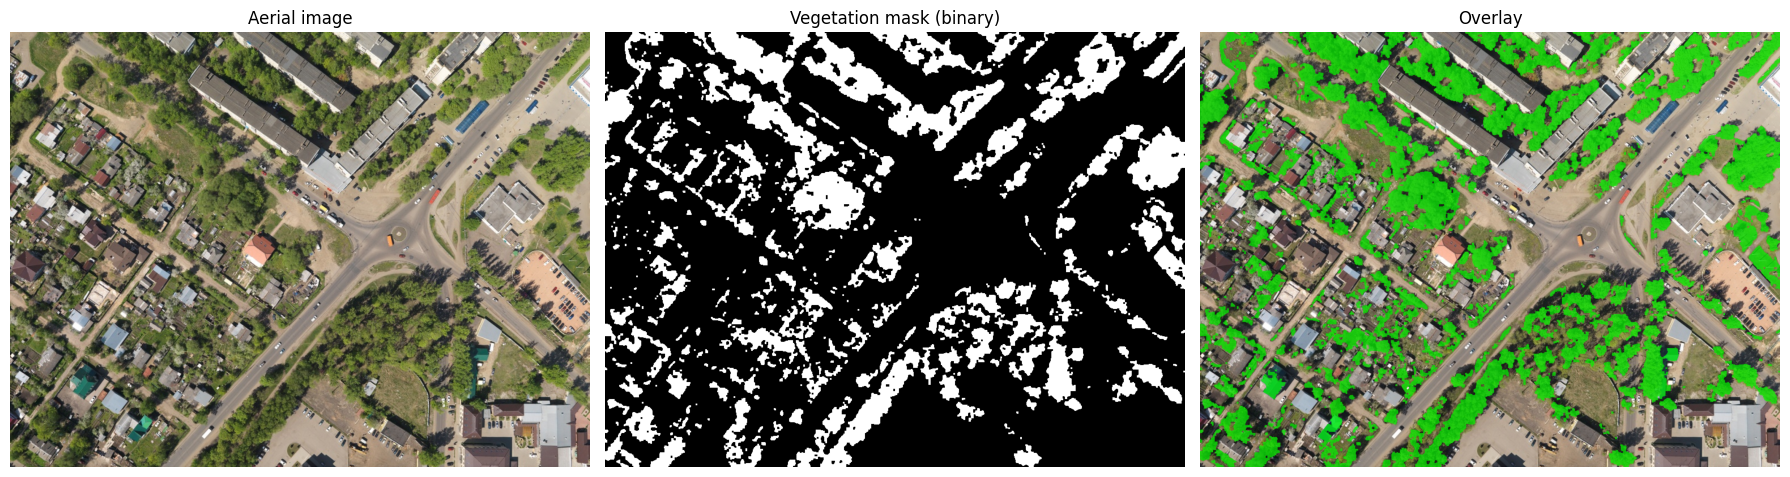

Доля зелёных насаждений: 0.2405 (24.05%)
Оценка погрешности из-за выбора порогов: ±0.2056 (±20.56 п.п.)
(строго: 3.49%, мягко: 35.77%)


In [70]:
# Сегментация зелёных насаждений по HSV (пороговая модель)
# OpenCV HSV: H ∈ [0,179], S,V ∈ [0,255]

aerial_hsv = cv2.cvtColor(aerial_image, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(aerial_hsv)

# 1) Посмотрим гистограммы каналов, чтобы подобрать пороги
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].hist(h.ravel(), bins=180, range=(0, 179), color='tab:orange')
axs[0].set_title('Hue (H) histogram')
axs[0].set_xlim(0, 179)
axs[1].hist(s.ravel(), bins=256, range=(0, 255), color='tab:blue')
axs[1].set_title('Saturation (S) histogram')
axs[1].set_xlim(0, 255)
axs[2].hist(v.ravel(), bins=256, range=(0, 255), color='tab:gray')
axs[2].set_title('Value (V) histogram')
axs[2].set_xlim(0, 255)
plt.tight_layout()
plt.show()

# 2) Пороговая маска (подберите под ваш снимок при необходимости)
# Типичные значения для зелени (но зависят от освещения/камеры/сезона)
h_low, h_high = 35, 90
s_low = 50
v_low = 40

mask = ((h >= h_low) & (h <= h_high) & (s >= s_low) & (v >= v_low)).astype(np.uint8)

# Немного подчистим шум (опционально)
kernel = np.ones((3, 3), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=1)
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=1)

# 3) Визуализация маски + наложение на исходник
mask_bool = mask.astype(bool)

overlay = aerial_image.copy()
# подсветим зелёные пиксели чисто зелёным, смешав с исходным
highlight = np.array([0, 255, 0], dtype=np.uint8)
overlay[mask_bool] = (0.35 * overlay[mask_bool] + 0.65 * highlight).astype(np.uint8)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(aerial_image)
axs[0].set_title('Aerial image')
axs[0].axis('off')
axs[1].imshow(mask, cmap='gray', vmin=0, vmax=1)
axs[1].set_title('Vegetation mask (binary)')
axs[1].axis('off')
axs[2].imshow(overlay)
axs[2].set_title('Overlay')
axs[2].axis('off')
plt.tight_layout()
plt.show()

# 4) Доля зелёных насаждений
share = mask.mean()  # т.к. mask ∈ {0,1}
print(f"Доля зелёных насаждений: {share:.4f} ({share*100:.2f}%)")

# 5) Оценка погрешности (на глаз) через неуверенность в выборе порогов.
# Возьмём 'строгие' и 'мягкие' пороги, отражающие разумный диапазон сомнений.
# (Вы можете подкорректировать dH/dS/dV по тому, насколько размыта граница на гистограмме.)
dH, dS, dV = 5, 20, 10

mask_strict = (
    (h >= h_low + dH) & (h <= h_high - dH) & (s >= s_low + dS) & (v >= v_low + dV)
).astype(np.uint8)
mask_soft = (
    (h >= max(0, h_low - dH)) & (h <= min(179, h_high + dH)) & (s >= max(0, s_low - dS)) & (v >= max(0, v_low - dV))
).astype(np.uint8)

# применим те же морфологические операции, чтобы сравнение было честнее
mask_strict = cv2.morphologyEx(mask_strict, cv2.MORPH_OPEN, kernel, iterations=1)
mask_strict = cv2.morphologyEx(mask_strict, cv2.MORPH_CLOSE, kernel, iterations=1)
mask_soft = cv2.morphologyEx(mask_soft, cv2.MORPH_OPEN, kernel, iterations=1)
mask_soft = cv2.morphologyEx(mask_soft, cv2.MORPH_CLOSE, kernel, iterations=1)

share_strict = mask_strict.mean()
share_soft = mask_soft.mean()

# как оценку ошибки возьмём наибольшее отклонение от основного значения
err = max(abs(share - share_strict), abs(share_soft - share))
print(f"Оценка погрешности из-за выбора порогов: ±{err:.4f} (±{err*100:.2f} п.п.)")
print(f"(строго: {share_strict*100:.2f}%, мягко: {share_soft*100:.2f}%)")


# 3. Интегральные изображения

## Упражнение 6

Напомним, что интегральным изображением называется следующая функция:

$$
    I(x, y) = \sum_{i = 0}^{x} \sum_{j = 0}^{y} f(i, j)
$$

С помощью интегрального изображения можно за $O(1)$ вычислять сумму интенсивностей в произвольной прямоугольной области. Требуется реализовать расчет интегрального изображения, а также быстрый расчет сумм интенсивностей в прямоугольнике заданном верхним левым углом, шириной и высотой $x, y, w, h$.

$$
    L(x,y) = I(x,y) + L(x,y-1) + L(x-1,y) – L(x-1,y-1)
$$

<img src="data/input_image.jpg" width="30%" /> <img src="data/integral_image.jpg" width="30%" /> <img src="data/rect.jpg" width="30%" />

In [71]:
class IntegralImage:

    def __init__(self, img):
        assert len(img.shape) == 2  # только для серых изображений

        self.img = img

        # Считаем интегральное изображение с нулевой рамкой сверху/слева.
        # Тогда сумма на прямоугольнике считается одной формулой без if.
        img64 = img.astype(np.int64, copy=False)
        h, w = img64.shape
        self.integral = np.zeros((h + 1, w + 1), dtype=np.int64)
        self.integral[1:, 1:] = np.cumsum(np.cumsum(img64, axis=0), axis=1)

    def sum(self, x, y, w, h):
        # Сумма интенсивностей в прямоугольнике:
        # (x, y) — верхний левый угол, w — ширина, h — высота
        assert w >= 0 and h >= 0
        assert 0 <= x <= self.img.shape[1] and 0 <= y <= self.img.shape[0]
        assert x + w <= self.img.shape[1] and y + h <= self.img.shape[0]

        x1, y1 = x, y
        x2, y2 = x + w, y + h

        I = self.integral
        return int(I[y2, x2] - I[y1, x2] - I[y2, x1] + I[y1, x1])


In [72]:
I = IntegralImage(img_gray)

In [73]:
x, y, w, h = 0, 0, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

x, y, w, h = 100, 100, 100, 100
assert(img_gray[y:y + h, x:x + w].sum() == I.sum(x, y, w, h))

## Вопрос 6

В каких задачах может потребоваться использовать интегральное изображение?

**Ответ:** Интегральное изображение (суммированная таблица площадей) используется в задачах, где нужно быстро вычислять сумму пикселей в произвольной прямоугольной области. Например, фильтры свертки.